In [14]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import math
import model.AutoEncoderConv1d

In [15]:
from tqdm import tqdm, trange
import os
from utils.utils import plot_recon_error

In [16]:
pickle_path = 'data/pickle'
writer = SummaryWriter('result/tensorboard')

import pickle
def load_pickle(filename):
    print(f'load pickle <- {filename}')
    with open(filename, 'rb') as lf:
        load_data = pickle.load(lf)
    return load_data

x_list = load_pickle(pickle_path + '/x.pickle')
y_list = load_pickle(pickle_path + '/y.pickle')
z_list = load_pickle(pickle_path + '/z.pickle')
combined = np.transpose((x_list, y_list, z_list))
combined.shape

load pickle <- data/pickle/x.pickle
load pickle <- data/pickle/y.pickle
load pickle <- data/pickle/z.pickle


(4618332, 3)

In [17]:
# split
length_piece = 20
print(f'shape of combined data: {combined.shape}')
cut = combined.shape[0]//length_piece*length_piece
combined_splited  = np.split(combined[:cut, :], cut//length_piece, axis=0)
print(f'length of combined_splited: {len(combined_splited)}')
# print(f'first single shape: {combined_splited[0].shape}')
# print(f'last single shape: {combined_splited[-1].shape}')
print('list shape : (461, 10000, 3)')
input_data = np.stack(combined_splited, axis=0).transpose((0, 2, 1))
print(f'input_data shape: {input_data.shape}')

shape of combined data: (4618332, 3)
length of combined_splited: 230916
list shape : (461, 10000, 3)
input_data shape: (230916, 3, 20)


In [18]:
# DataLoader
train_data, valid_data = random_split(input_data, [200000, 30916])
train_loader = DataLoader(train_data, batch_size=12, shuffle=True) #, num_workers=6)
valid_loader = DataLoader(valid_data, batch_size=12)
all_loader = DataLoader(input_data, batch_size=12)

**input: (N, C_in, L_in) or (C_in, L_in)
output: (N, C_out, L_out)**

In [19]:
device = "cuda:0"

In [27]:
if os.path.exists('model/model_conv1D.pt') and False:
    model_conv1D = torch.load('model/model_conv1D.pt').to(device)
else:
    model_conv1D = model.AutoEncoderConv1d.AutoEncoderConv1d(3).to(device)
    loss_func = nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model_conv1D.parameters(), lr=1e-4)

    epochs = 10
    train_loss_values = []
    valid_loss_values = []
    for epoch in trange(epochs):
        # train
        train_loss = 0.0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            outputs = model_conv1D(batch)
            loss1 = loss_func(outputs, batch)
            #print(loss1)
            loss1.backward()
            optimizer.step()
            train_loss += loss1.item()

        train_loss /= len(train_loader)
        train_loss_values.append(train_loss)


        # validation
        valid_loss = 0.0
        model_conv1D.eval()
        for batch in valid_loader:
            batch = batch.to(device)
            valid_output = model_conv1D(batch)
            loss2 = loss_func(batch, valid_output)
            print(loss2.item)
            valid_loss += loss2.item()
        valid_loss /= len(valid_loader)
        valid_loss_values.append(valid_loss)
        writer.add_scalars("Loss", {'train loss': train_loss, 'valid loss': valid_loss}, epoch)

        # if epoch%10==0:
        #     print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss} \t\t Validation Loss: {valid_loss}')
    torch.save(model_conv1D, 'model/model_conv1D.pt')
    writer.flush()

    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    ax.set_yscale('log')
    plt.title('Loss of train and valid')
    plt.plot(train_loss_values, 'r')
    plt.plot(valid_loss_values, 'g')
    plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.4065, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.4006, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3096, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3839, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3574, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3806, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3828, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3417, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.4064, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3548, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3595, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3802, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3507, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3665, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3737, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3327, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.3370, device='cuda:0', grad_fn=<MseLossBackward

  0%|          | 0/20 [00:03<?, ?it/s]

tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward

KeyboardInterrupt: 

# calculate the time
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
np.random.rand(100,100,200)
end.record()
# Waits for everything to finish running
torch.cuda.synchronize()
print(start.elapsed_time(end))

In [21]:
def get_item_loader(dataloader, idx):
    dataloader_iterator = iter(dataloader)
    for i in range(idx):
        try:
            batch_data = next(dataloader_iterator)
        except StopIteration:
            dataloader_iterator = iter(dataloader)
            batch_data = next(dataloader_iterator)
        print(batch_data)

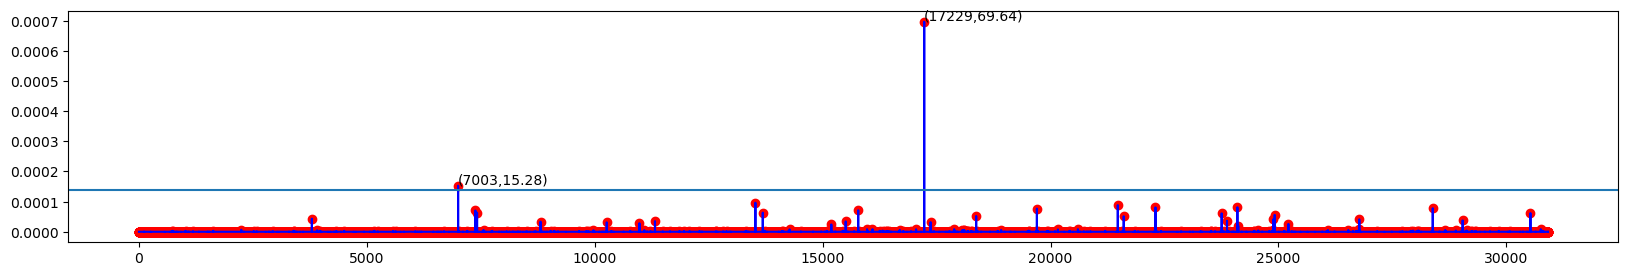

In [22]:
def get_losses(data, model, batch_size=1):
    """ input data and return its losses """
    loader = DataLoader(data, batch_size=batch_size)
    losses = []
    for batch in loader:
        batch = batch.to(device)
        model = model.to(device)
        output = model(batch)
        loss_func = nn.MSELoss().to(device)
        loss = loss_func(batch, output)
        loss2 = batch - output
        losses.append(loss.item())
    return losses

def plot_loss(losses, threshold):
    """ input losses and plot it """
    fig = plt.figure(figsize=(20,3))
    plt.plot(losses, 'ro', losses, 'b-')
    plt.axhline(threshold)
    #annotation outlier point
    for i in range(len(losses)):
        if losses[i] > threshold:
            plt.annotate(f'({i},{losses[i] * 1e5:.2f})', xy=(i, losses[i]), xytext=(i - 10, losses[i] + 0.4e-5))



plot_loss(get_losses(valid_data, model_conv1D), 14e-5)

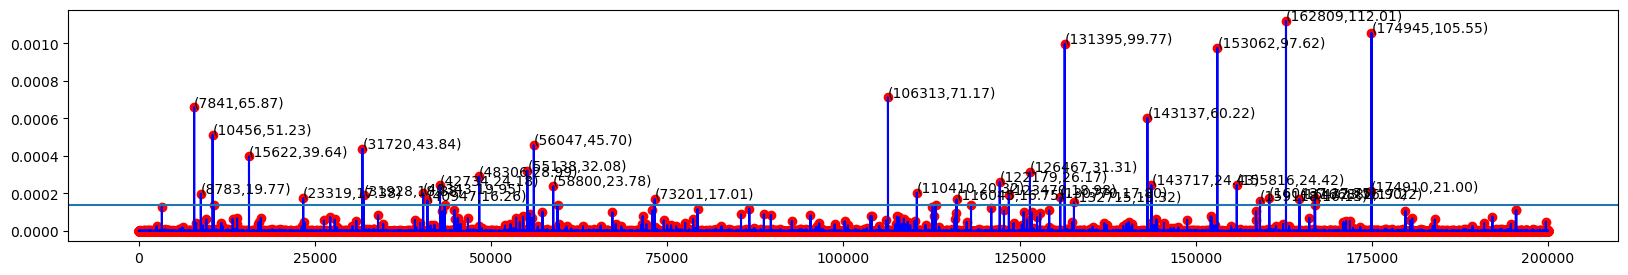

In [23]:
# why does it calculate for so much time?
plot_loss(get_losses(train_data, model_conv1D), 14e-5)

In [ ]:
# doing some test


In [24]:
test_losses_all = []
for batch in all_loader:
    batch = batch.to(device)
    model_conv1D = model_conv1D.to(device)
    valid_output = model_conv1D(batch)
    loss_func = nn.MSELoss().to(device)
    loss_test = loss_func(batch, valid_output)
    test_losses_all.append(loss_test.item())
plot_loss(test_losses_all)

TypeError: plot_loss() missing 1 required positional argument: 'threshold'

In [ ]:
# get the origin and reconstruction data
# batch = torch.from_numpy(input_data[:12,:,:])
batch = torch.from_numpy(input_data[:12,:,:]+np.random.normal(0,0.003,(12,3,200)))
model_conv1D = model_conv1D.to('cpu')
batch = batch.float()
# print(batch.dtype)
origin = batch
recons = model_conv1D(batch)
#plot_recon_error(origin.detach().numpy(), recons.detach().numpy())

In [ ]:
# we need to calculate the loss
def calculate_loss(input):
    """
    calculate the loss
    :param input: numpy or torch tensor
    :return: MSE loss
    """
    input1 = torch.FloatTensor(input[:12, :, :])
    input1 = input1.float()
    recons = model_conv1D(input1)
    loss_function = nn.MSELoss().to(device)
    loss = loss_function(input1, recons)
    return loss

In [ ]:
calculate_loss(input_data + np.random.normal(0,0.3,input_data.shape))